<a href="https://colab.research.google.com/github/darklucifar/machineLearn_0602/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #引入表格函示庫
from sklearn.datasets import load_iris #搜尋【sklearn datasets】>>鳶尾花
iris = load_iris()
#DataFrame: 表格.series:一行/一列
df = pd.DataFrame(iris["data"],
          columns=iris["feature_names"])
# df["ans"] = -1
df["ans"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8",index=False)#盡量存成CSV，只要open檔案就必須打encoding編碼。
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# sklearn前：pandas.DataFrame
# sklearn後：np.array
import numpy as np
from sklearn.model_selection import train_test_split
train_test_split([1,2,3,4],
        [5,6,7,8],
        [9,10,11,12],
        test_size=0.25)
x, y=np.array(df.drop(["ans"], axis=1)), np.array(df["ans"])
#axis=1(資料雙向鏈結)
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(135, 4)
(15, 4)
(135,)
(15,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
#DecisionTree決策樹
clf.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(279.0, 489.24, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 135\nvalue = [44, 46, 45]\nclass = versicolor'),
 Text(209.25, 380.52000000000004, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(348.75, 380.52000000000004, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 91\nvalue = [0, 46, 45]\nclass = versicolor'),
 Text(279.0, 271.8, 'petal length (cm) <= 4.95\ngini = 0.147\nsamples = 50\nvalue = [0, 46, 4]\nclass = versicolor'),
 Text(139.5, 163.08000000000004, 'petal width (cm) <= 1.65\ngini = 0.043\nsamples = 45\nvalue = [0, 44, 1]\nclass = versicolor'),
 Text(69.75, 54.360000000000014, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]\nclass = versicolor'),
 Text(209.25, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(418.5, 163.08000000000004, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(348.75, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 

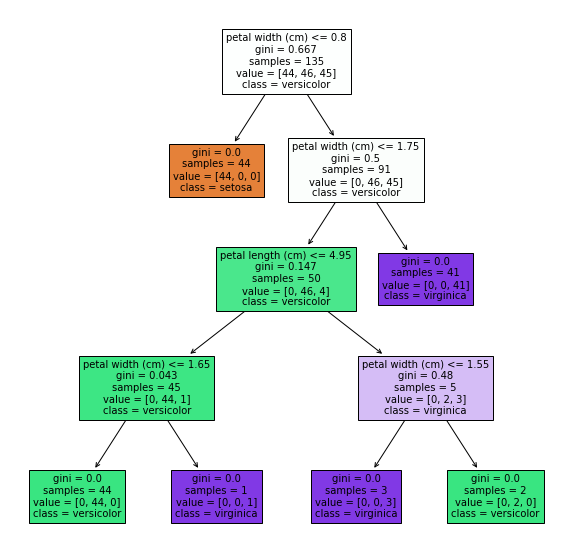

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(clf,
    feature_names=iris["feature_names"],
    class_names=iris["target_names"],
    filled=True)


In [ ]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(pre, y_test)


0.8666666666666667